In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier

# Load the data
df = pd.read_csv('Train.csv')
#test_df = pd.read_csv('Test.csv')



In [5]:
# Convert Label column to float
df.dtypes #= df['Label'].astype(float)


ID                           object
I/O Data Operations         float64
 I/O Data Bytes             float64
Number of subprocesses      float64
Time on processor           float64
Disk Reading/sec            float64
Disc Writing/sec            float64
Bytes Sent/sent             float64
Received Bytes (HTTP)       float64
Network packets sent        float64
Network packets received    float64
Pages Read/sec              float64
Pages Input/sec             float64
Page Errors/sec             float64
Confirmed byte radius       float64
Label                       float64
dtype: object

In [6]:
df['Label'] = df['Label'].astype(float)

<AxesSubplot:title={'center':'Correlation with target'}>

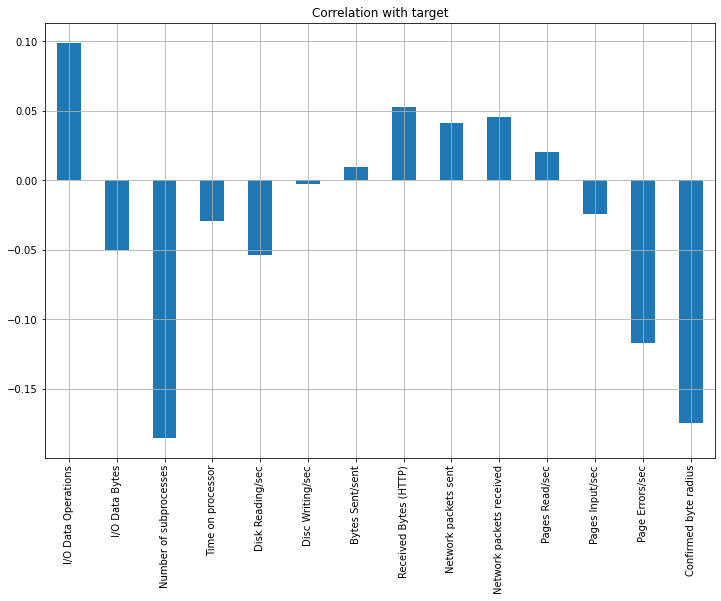

In [7]:
df.drop('Label', axis=1).corrwith(df.Label).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [8]:
# Remove irrelevant features and drop duplicates
df_new = df.drop(['ID', 'Number of subprocesses', 'Confirmed byte radius', 'Page Errors/sec', 'Disc Writing/sec'], axis=1)
df_new = df_new.drop_duplicates()

# Split the data into input features and labels
x = df_new.drop(['Label'], axis=1)
y = df_new['Label']

# Standardize the input features
scaler= StandardScaler()
x=scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier with hyperparameters
boost_model = XGBClassifier(n_jobs=-1, random_state=42, max_depth=5)

# Evaluate the performance using cross-validation
cv_scores = cross_val_score(boost_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', cv_scores)
print('Average score:', np.mean(cv_scores))

# Train the model on the entire training set
boost_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = boost_model.predict(x_test)

# Evaluate the performance using accuracy and ROC AUC scores
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_pred))


Cross-validation scores: [0.95819672 0.95406071 0.95077933 0.95159967 0.95324036]
Average score: 0.9535753573878079
Accuracy score: 0.9612860892388452
ROC AUC score: 0.951280387810636
